

# Project: Investigate a Dataset - TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project I will be analyzin dataset the's associated with "TMDB Movies" , This dataset contains huge information about movies that are collected from the Movie Database (TMDb).

I'm very interested to find more about the movie ratings and revenue.


In [5]:
# set up import statements for all of the packages 
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns



to start, i will import all the packes that i will need in this project.

<a id='wrangling'></a>
## Data Wrangling


### General Properties
First of all I'm starting with loading the dataset and then reading the 5 first rows to undrstand data more.

In [6]:
# Load data and print out a few lines. 
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


then, will look for more information about the data. 

In [7]:
df.shape

(10866, 21)

It shows that the data continue 10866 rows and 21 columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

the shown data above shows there is some mising values as well as wrong data type for the (relase data).

In [9]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [10]:
#check null value
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

as shown there is a lot of mising values.

In [11]:
#check duplicate value
df.duplicated().sum()

1

there is one duplication in the rows 

after assessing, it shows that there is some wrong data type and missing valus also some duplicated data.


### Data Cleaning
First:I will be removing the duplicated row.

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
#checking after removing duplicated data.

sum(df.duplicated())

0

Second:I will fill the missing values

In [14]:
df = df.fillna(0)

In [15]:
#checking after filling the missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10865 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10865 non-null object
homepage                10865 non-null object
director                10865 non-null object
tagline                 10865 non-null object
keywords                10865 non-null object
overview                10865 non-null object
runtime                 10865 non-null int64
genres                  10865 non-null object
production_companies    10865 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj           

Third: I will change the data type of the release_date from object to datetime


In [16]:
df['release_date'] = pd.to_datetime(df['release_date'])


In [17]:
#checking after changing the data type.
df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

Fouth: I will remove the column that i dont need.

In [18]:
df.drop(['imdb_id', 'homepage', 'overview', 'budget_adj','revenue_adj'], axis = 1, inplace = True)


In [19]:
#checking after drop column
df.head()

,id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015


Fifth: I will be using the first movie category intsed of having multible category by grouping them it will help me to classfiy the movie much easier.

In [20]:
df['genres'] =df['genres'].str.split('|', expand=True)

<a id='eda'></a>
## Exploratory Data Analysis



### General look

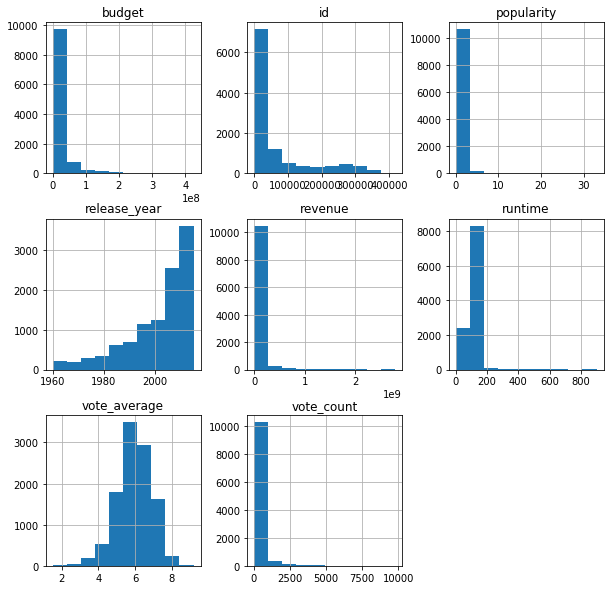

In [21]:
df.hist(figsize=(10,10));

### Research Question 1 (what year has most movie releasing ?)

Text(0.5,0,'year')

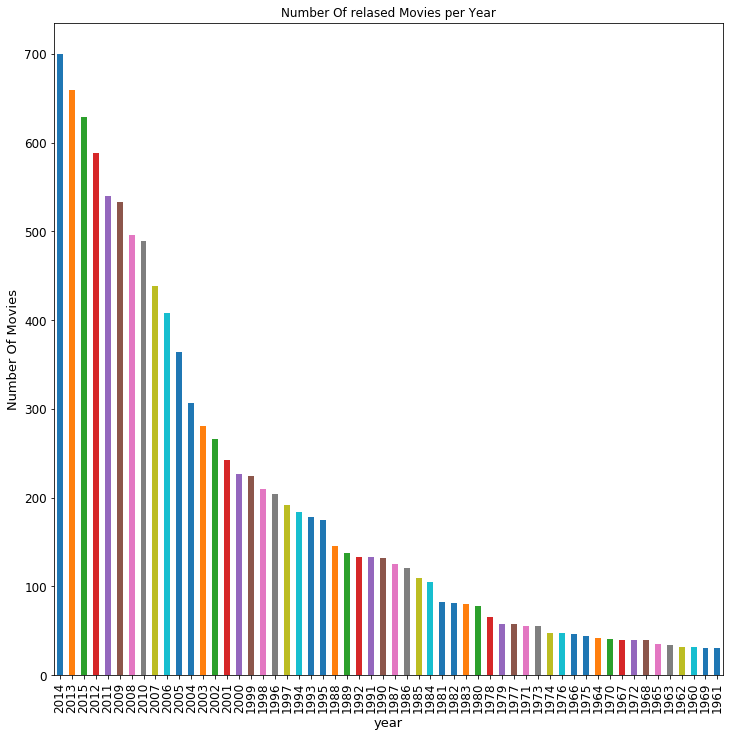

In [22]:

df['release_year'].value_counts().plot(title='Number Of relased Movies per Year',kind='bar',fontsize = 12 ,figsize=(12,12));

plt.ylabel('Number Of Movies',fontsize = 13)
plt.xlabel('year',fontsize = 13 )


the above chart shows that 2014 has the most movie releasing.

In [23]:
df['release_year'].value_counts().head(3)

2014    700
2013    659
2015    629
Name: release_year, dtype: int64

### Research Question 2 (what the highest prdouced movie genres ?)

In [24]:
#will shows the count of each movie category
df['genres'].value_counts()

Drama              2453
Comedy             2319
Action             1590
Horror              915
Adventure           586
Thriller            491
Documentary         432
Animation           403
Crime               380
Fantasy             272
Science Fiction     214
Romance             186
Family              144
Mystery             125
Music               100
TV Movie             78
War                  59
History              44
Western              42
Foreign               9
Name: genres, dtype: int64

Text(0.5,0,'Category')

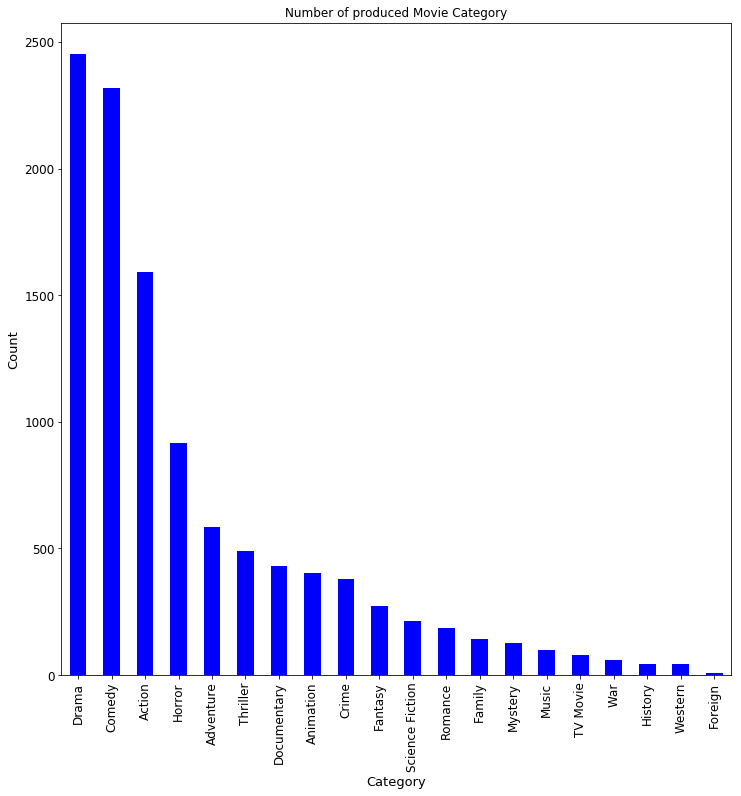

In [25]:
df['genres'].value_counts().plot(title='Number of produced Movie Category',kind='bar',fontsize = 12 ,figsize=(12,12),color="b");

plt.ylabel('Count',fontsize = 13)
plt.xlabel('Category',fontsize = 13 )


it show that hightest movie catgory production is drama with 2453.

### Research Question 3 (Does the highest prdouced movie have the highest popularity ?)

In [26]:
df.groupby('genres')['popularity'].mean().sort_values(ascending=False)

genres
Adventure          1.217868
Science Fiction    1.073096
Fantasy            0.865390
Action             0.836394
Animation          0.810370
War                0.767041
History            0.764636
Family             0.730987
Romance            0.704157
Crime              0.694063
Western            0.690646
Thriller           0.673381
Mystery            0.596896
Drama              0.552446
Comedy             0.537133
Horror             0.468611
Music              0.447730
TV Movie           0.246190
Documentary        0.177023
Foreign            0.167124
Name: popularity, dtype: float64

the highest produced movie catgory was "drama" but it shows that the highest pupolority end to be "Adventure".

### Research Question 4 (Does the highest prdouced movie have the highest vote ?)

In [27]:
a = df.groupby('genres')['vote_count'].mean().sort_values(ascending=False)
print(a)

genres
Adventure          555.662116
Science Fiction    511.920561
Action             339.035849
Fantasy            316.018382
Animation          284.059553
War                259.796610
History            246.340909
Crime              227.457895
Romance            217.607527
Family             215.715278
Thriller           207.454175
Western            184.523810
Drama              165.370567
Mystery            159.560000
Comedy             142.033635
Horror             121.806557
Music               94.090000
Documentary         34.648148
TV Movie            28.692308
Foreign             20.333333
Name: vote_count, dtype: float64


Text(0,0.5,'votes')

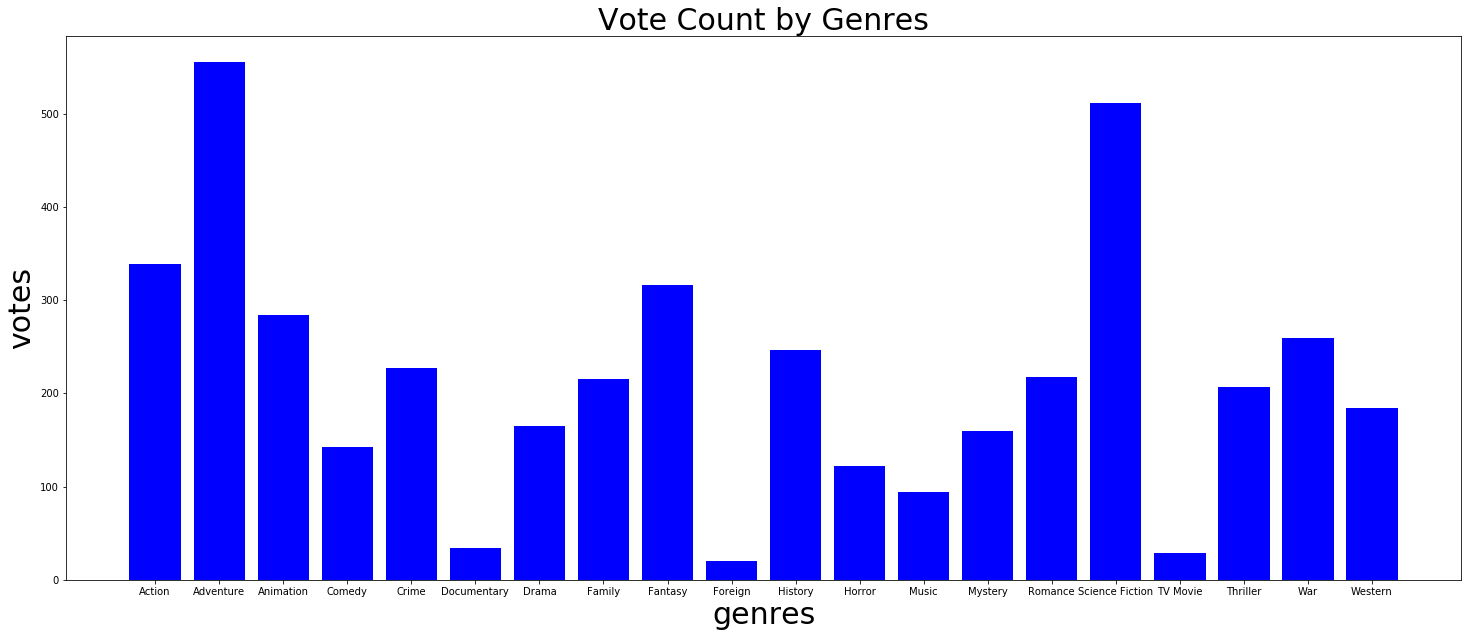

In [28]:
plt.subplots(figsize=(25, 10))
plt.bar(a.index, a ,color="b")
plt.title('Vote Count by Genres',fontsize = 30)
plt.xlabel('genres',fontsize = 30)
plt.ylabel('votes',fontsize = 30)


As shown above the highest vote was for both Adventure,Science Fiction.

### Creating functions 

In [29]:
#creating a function that will help us to find the average of selected column
def avg_find(x):
    return df[x].mean()

In [30]:
avg_find('revenue')

39826896.076852277

In [33]:
avg_find('budget')

14624286.06433502

<a id='conclusions'></a>
## Conclusions

1- the most movie production was in 2014 with 700 movie. <br>
2- there was high continous movie production between the years 2012~2015.<br>
3- the charts shows that the movie production is continously increasing by the years.<br>
4- the highest produced movie end to be drama genres.<br> 
5- the highest vote were Adventure and the lowest is foreign.<br>
6- the most popular is Adventure and the last is also foreign.<br>
7- in term of publishing the drama take the firt place however it doent take place in both popularity and voting.<br>

## Limitaions
1-there was huge amount of missing vlaues <br>
2-some wrong data type<br>
3-few duplications <br>






In [31]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0